---

# Задание 1

1. Загрузите данные из файла ***данные для кластеризации.xlsx*** (находится в папке datasets).
2. Метки класса из столбца *Office* присвойте вектору *y*, остальные данные для кластеризации присвойте матрице *X*.
3. Нормализуйте данные матрицы X.
4. Импортируйте метод ***KMeans***.
5. Проведите анализ на количество кластеров с помощью метода локтя, а так же на основе метрик *silhouette_score*, *calinski_harabasz_score* и *davies_bouldin_score*. 
6. Сделайте выводы по результатам анализа.
7. Обучите модель *KMeans* с разбиением на два кластера.
8. Оцените результат с помощью *classification_report()*, сравнив попадание объектов в кластеры с реальными классами объектов из исходного файла с данными. Имейте в виду, что кластеры - это не классы, поэтому важно то, что одни и те же объекты попали внутрь одной группы, а не то, какой номер группы им присвоен моделью. На протяжении всех заданий мы будем оценивать качество кластеризации, сравнивая кластеры с классификацией данных по признакам: Rain и Office.
9. Оцените результат кластеризации с помощью функции *metrics4()* и заполните соответствующий столбец таблицы итогов кластеризации *m4*.
10. Сделайте выводы по результатам оценки качества кластеризации.

---

***Рекомендации:***

1. При проведении анализа на количество кластеров выбирайте верхнюю границу диапазона не меньше 100 (для метода локтя 50).
2. Не забывайте, что модель может нумеровать кластеры не в том порядке, как в данных.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pylab
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 10)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
------------------------Office-----------------------
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84     11402
         1.0       0.79      0.85      0.82      9389

    accuracy                           0.83     20791
   macro avg       0.83      0.83      0.83     20791
weighted avg       0.83      0.83      0.83     20791

silhouette_score = 0.25040048750793253
calinski_harabasz_score = 6832.006452521765
davies_bouldin_score = 1.7021632261591582
adjusted_rand_score = 0.43220553936925665
-------------------------Rain------------------------
              precision    recall  f1-score   support

         0.0       0.37      0.52      0.43      8290
         1.0       0.57      0.42      0.48     12501

    accuracy                           0.46     20791
   macro avg       0.47      0.47      0.46     207

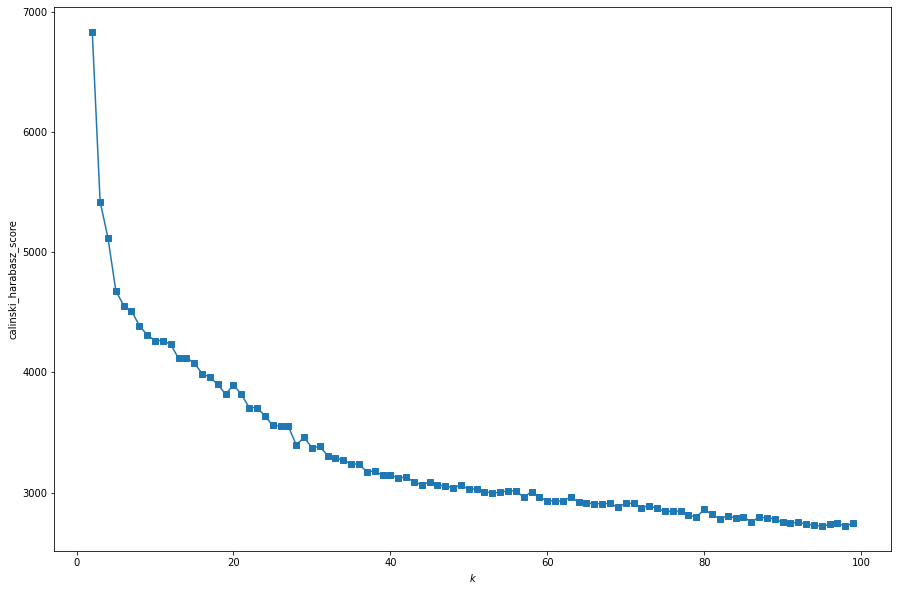

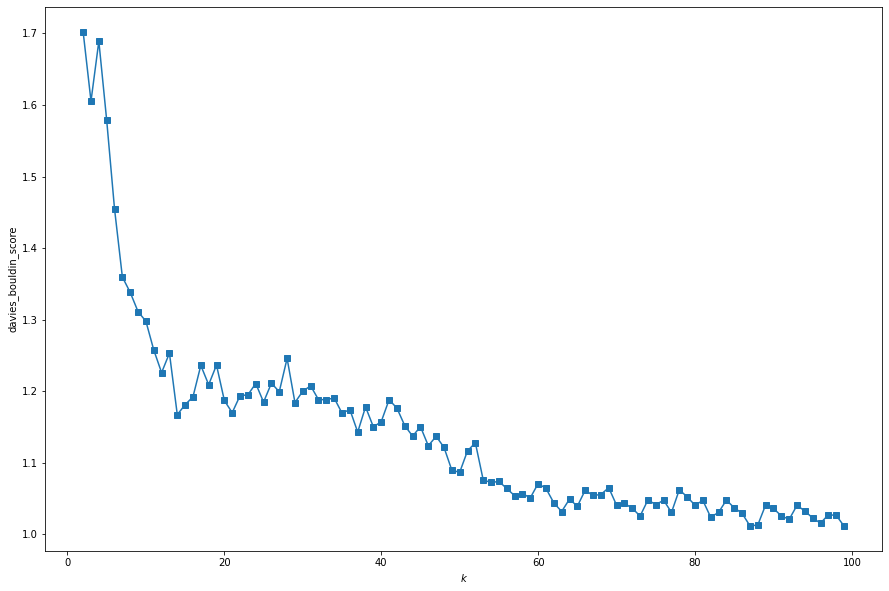

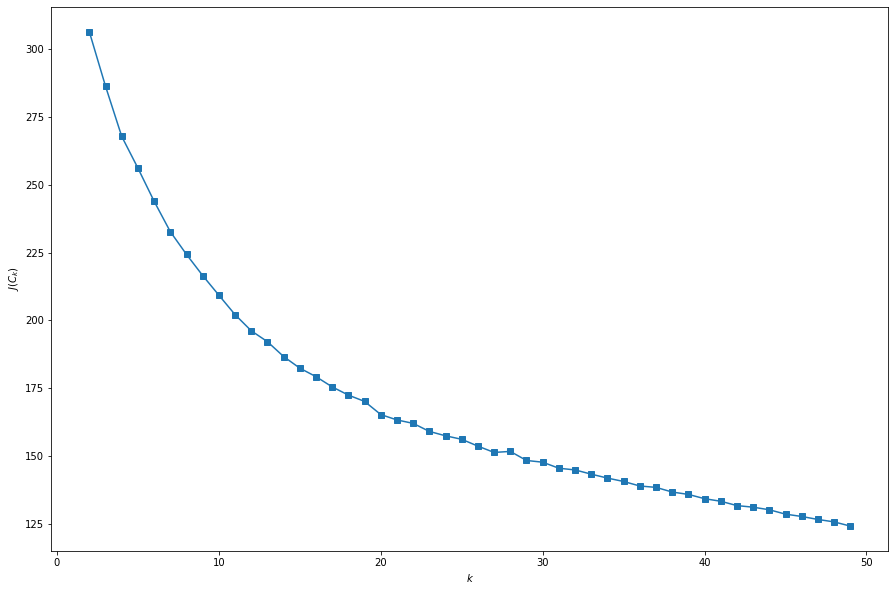

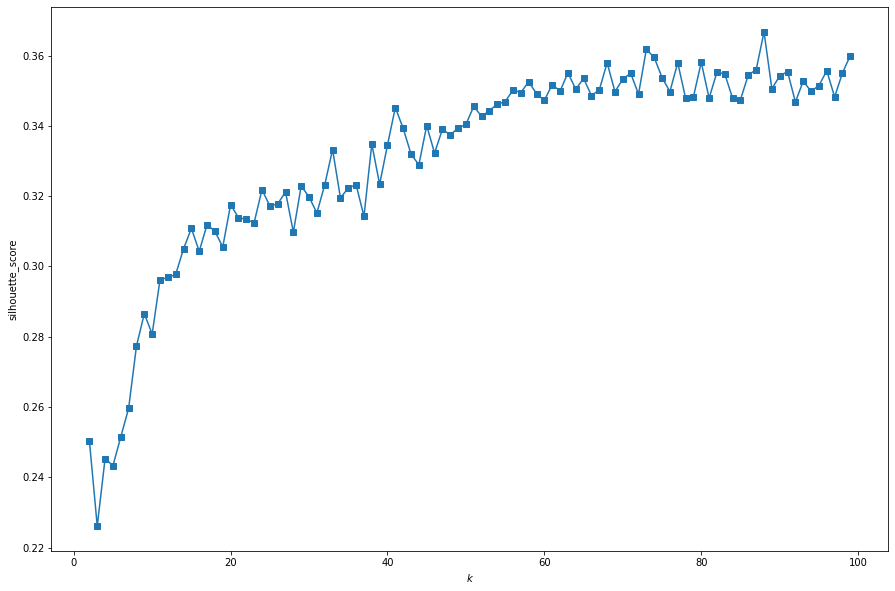

,KMeans Office,KMeans Rain
adjusted_rand_score,0.034764,0.006528
silhouette_score,0.339331,0.336909
calinski_harabasz_score,3063.068431,10811.298510
davies_bouldin_score,1.089353,1.318517


In [50]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/pythonDS/Tables/данные_для_кластеризации.xlsx')
y = df['Office']
X = ['weekday_sin','weekday_cos','Order_bac_sin','Order_bac_cos','Delivery_time_norm','Rain']
X = (df[X] - df[X].mean(axis=0))/df[X].std(axis=0)
kmeans = KMeans(n_clusters=2, random_state=21).fit(X)
yr = df['Rain']
Xr = ['weekday_sin','weekday_cos','Order_bac_sin','Order_bac_cos','Delivery_time_norm','Office']
Xr = (df[Xr] - df[Xr].mean(axis=0))/df[Xr].std(axis=0)
kmeans2 = KMeans(n_clusters=2, random_state=21).fit(Xr)
y1 = y
for i in range(0,len(y1)):
  if y1[i] == 0:
    y1[i] = 1
  else:
    y1[i] = 0
yr1 = yr
for i in range(0,len(yr1)):
  if yr1[i] == 0:
    yr1[i] = 1
  else:
    yr1[i] = 0
print('------------------------Office-----------------------')
print(classification_report(y1,kmeans.labels_))
print('silhouette_score =',silhouette_score(X, kmeans.labels_, random_state=21))
print('calinski_harabasz_score =',calinski_harabasz_score(X, kmeans.labels_))
print('davies_bouldin_score =',davies_bouldin_score(X, kmeans.labels_))
print('adjusted_rand_score =',adjusted_rand_score(y, kmeans.labels_))
print('-------------------------Rain------------------------')
print(classification_report(yr1,kmeans2.labels_))
print('silhouette_score =',silhouette_score(Xr, kmeans2.labels_, random_state=21))
print('calinski_harabasz_score =',calinski_harabasz_score(Xr, kmeans2.labels_))
print('davies_bouldin_score =',davies_bouldin_score(Xr, kmeans2.labels_))
print('adjusted_rand_score =',adjusted_rand_score(yr, kmeans2.labels_))
ch = []
for k in range(2, 100):
    km = KMeans(n_clusters=k, random_state=21).fit(X)
    ch.append(calinski_harabasz_score(X, km.labels_))

plt.plot(range(2, 100), ch, marker='s')
plt.xlabel('$k$')
plt.ylabel('calinski_harabasz_score')
plt.show()
db = []
for k in range(2, 100):
    km = KMeans(n_clusters=k, random_state=21).fit(X)
    db.append(davies_bouldin_score(X, km.labels_))

plt.plot(range(2, 100), db, marker='s')
plt.xlabel('$k$')
plt.ylabel('davies_bouldin_score')
plt.show()
inertia = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, random_state=21).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(2, 50), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()
silhouette = []
for k in range(2, 100):
    km = KMeans(n_clusters=k, random_state=21).fit(X)
    silhouette.append(silhouette_score(X, km.labels_, random_state=21))

plt.plot(range(2, 100), silhouette, marker='s')
plt.xlabel('$k$')
plt.ylabel('silhouette_score')
plt.show()
def metrics4(X, labels, y):
    result = [adjusted_rand_score(y, labels)]
    result.append(silhouette_score(X, labels, random_state=21))
    result.append(calinski_harabasz_score(X, labels))
    result.append(davies_bouldin_score(X, labels))
    return result

m4 = pd.DataFrame(index = ['adjusted_rand_score', 'silhouette_score', 'calinski_harabasz_score', 
                           'davies_bouldin_score'])
m4['KMeans Office'] = metrics4(X, kmeans.labels_, y)
m4['KMeans Rain'] = metrics4(Xr,kmeans2.labels_,yr)
m4

---

# Задание 2

1. Обучите общую модель агломеративной кластеризации.
2. Сделайте вывод о количестве кластеров в данных на основе дендрограммы.
3. Обучите модель агломеративной кластеризации для двух кластеров.
4. Оцените качество кластеризации и запишите результаты в таблицу.
5. Сделайте выводы о результатах кластеризации.

---

------------------------Office-----------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11402
         1.0       0.92      0.81      0.86      9389

    accuracy                           0.88     20791
   macro avg       0.89      0.88      0.88     20791
weighted avg       0.89      0.88      0.88     20791

-------------------------Rain------------------------
              precision    recall  f1-score   support

         0.0       0.38      0.58      0.46      8290
         1.0       0.58      0.38      0.46     12501

    accuracy                           0.46     20791
   macro avg       0.48      0.48      0.46     20791
weighted avg       0.50      0.46      0.46     20791



,KMeans Office,KMeans Rain,AgglomerativeClustering Office,AgglomerativeClustering Rain
adjusted_rand_score,0.432206,0.006528,0.589320,0.002643
silhouette_score,0.250400,0.336909,0.223899,0.305113
calinski_harabasz_score,6832.006453,10811.298510,5819.019760,8954.600873
davies_bouldin_score,1.702163,1.318517,1.787194,1.332037


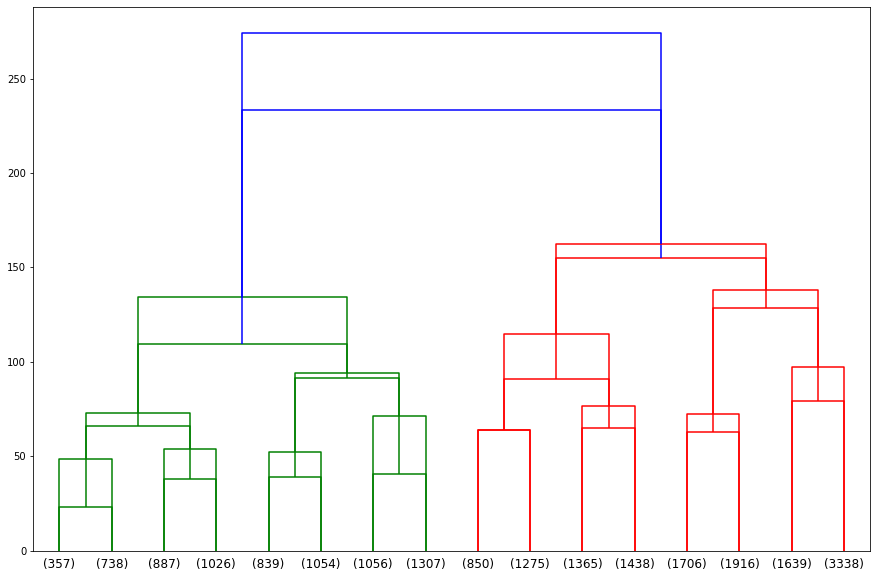

In [42]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    hierarchy.dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(Xr)
plot_dendrogram(model, truncate_mode='level', p=3)
plot_dendrogram(model2, truncate_mode='level', p=3)
model = AgglomerativeClustering(distance_threshold=None, n_clusters=2).fit(X)
model2 = AgglomerativeClustering(distance_threshold=None, n_clusters=2).fit(Xr)
print('------------------------Office-----------------------')
print(classification_report(y1, model.labels_))
print('-------------------------Rain------------------------')
print(classification_report(yr1, model.labels_))
m4['AgglomerativeClustering Office'] = metrics4(X, model.labels_, y)
m4['AgglomerativeClustering Rain'] = metrics4(Xr, model2.labels_, yr)
m4

---

# Задание 3

1. Обучить модель для 6 главных компонент.
2. Визуализировать сохраненную дисперсию.
3. Определить количество главных компонент, сохраняющих не менее 90% дисперсии.
4. Обучить модель для двух главных компонент и визуализировать данные.
5. Сделать выводы об эффективности применения метода главных компонент к решаемой задаче. По какому признаку можно разделить выборку на кластеры?

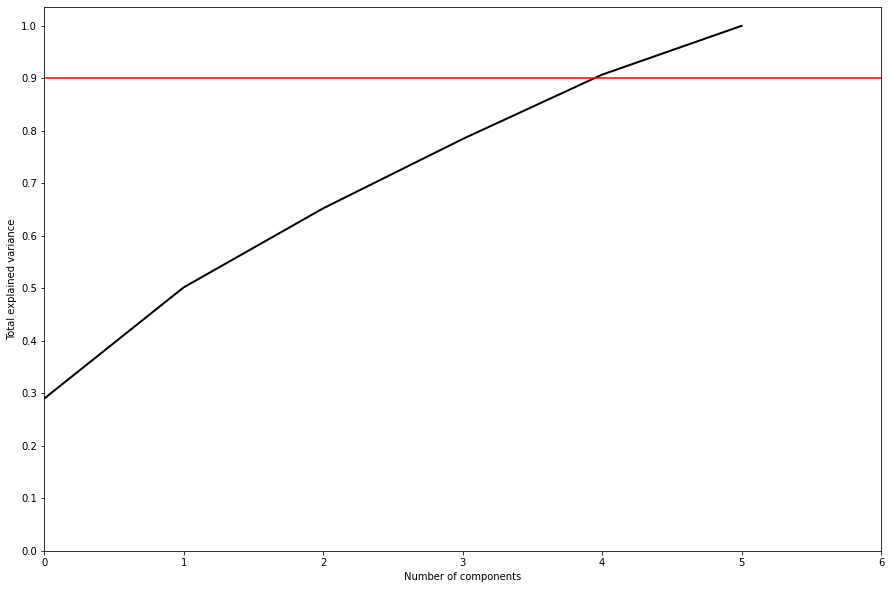

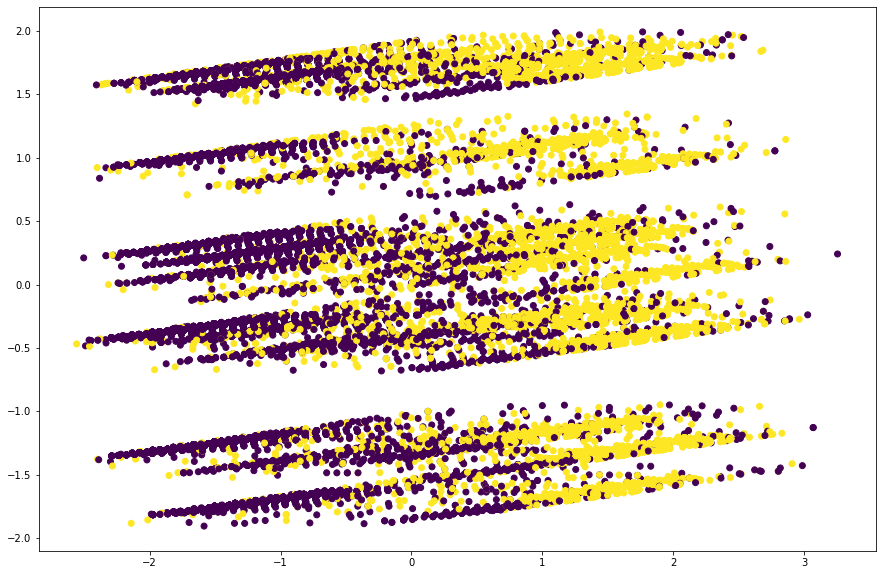

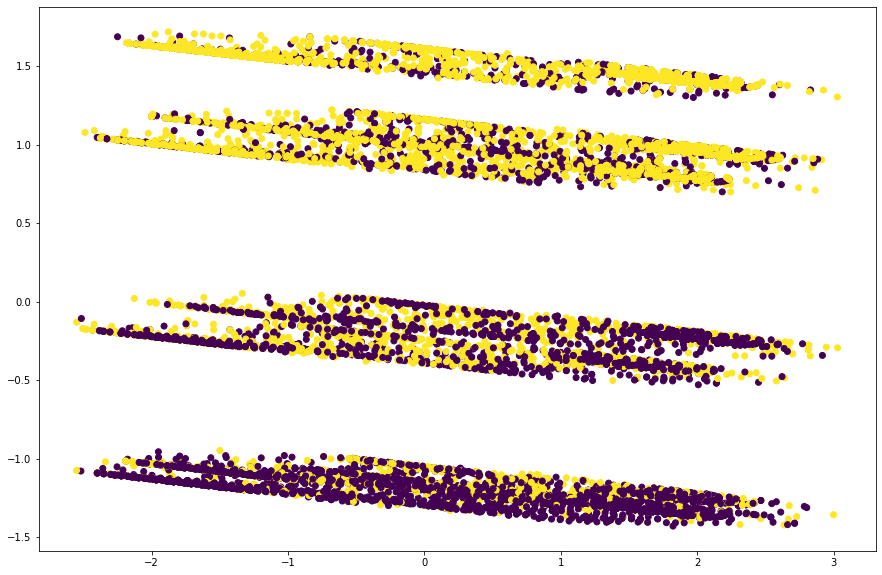

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=21)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
plt.plot(np.arange(0,6), np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 6)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.show()
pca = PCA(n_components=2, random_state=21)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y1)
plt.show()
pca = PCA(n_components=2, random_state=21)
X_cent = Xr - Xr.mean(axis=0)
pca.fit(X_cent)
X_pca = pca.transform(X_cent)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=yr1)
plt.show()

---

# Задание 4

Визуализируйте данные с помощью t-SNE при различных значениях perplexity. По какому признаку можно разделить данные на кластеры при достаточно большом значении perplexity?

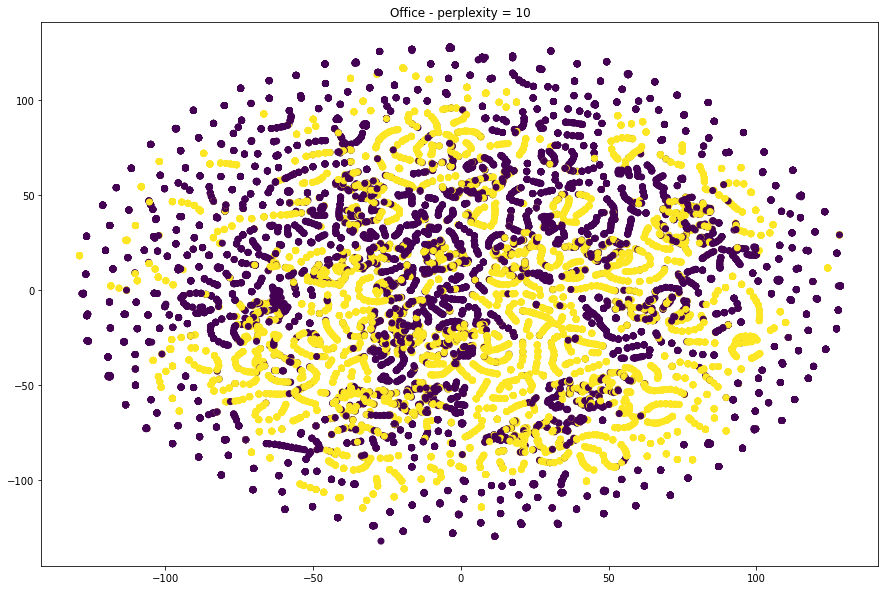

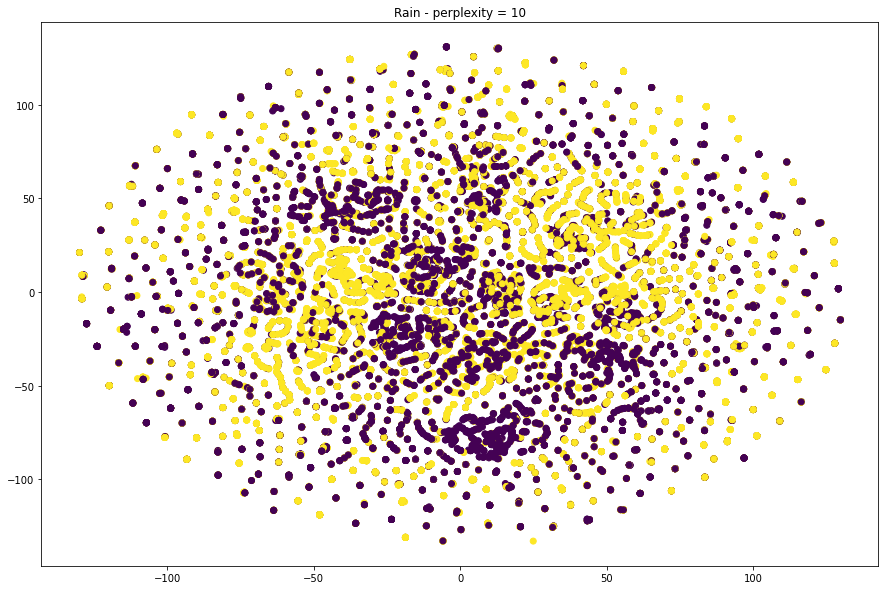

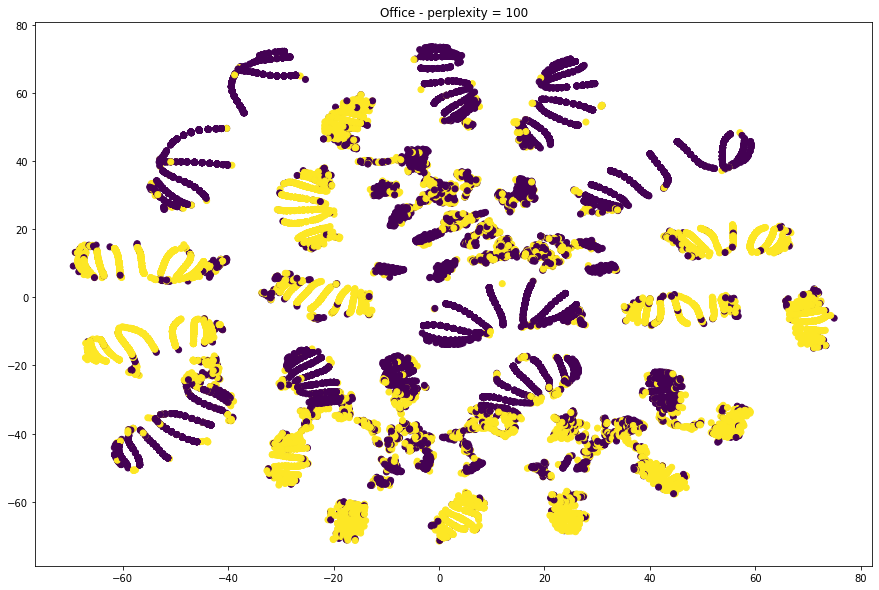

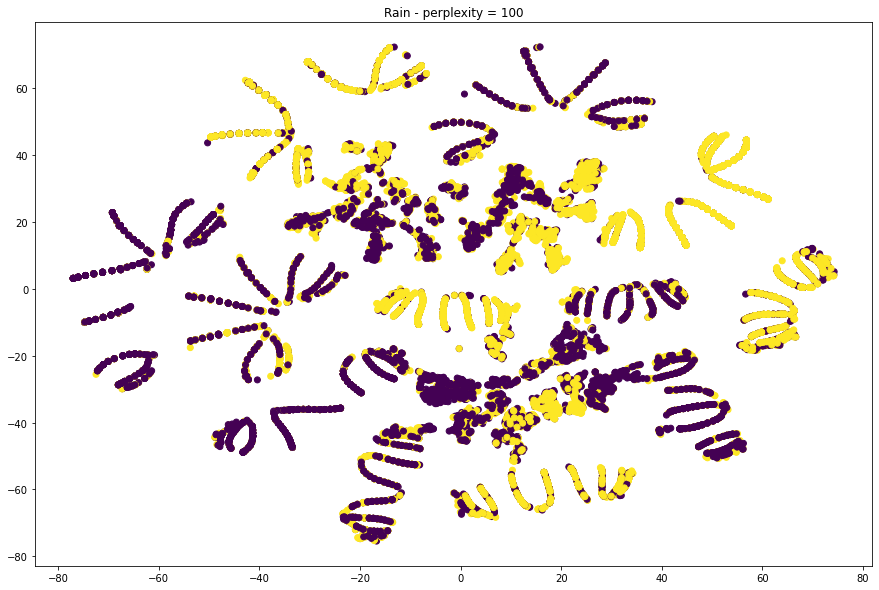

In [49]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, random_state=21)
tsne_representation = tsne.fit_transform(X)
tsne2 = TSNE(n_components=2, perplexity=10, random_state=21)
tsne_representation2 = tsne2.fit_transform(Xr)
tsne3 = TSNE(n_components=2, perplexity=100, random_state=21)
tsne_representation3 = tsne3.fit_transform(X)
tsne4 = TSNE(n_components=2, perplexity=100, random_state=21)
tsne_representation4 = tsne4.fit_transform(Xr)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=y)
plt.title('Office - perplexity = 10')
plt.show()
plt.scatter(tsne_representation2[:, 0], tsne_representation2[:, 1], c=yr)
plt.title('Rain - perplexity = 10')
plt.show()
plt.scatter(tsne_representation3[:, 0], tsne_representation3[:, 1], c=y)
plt.title('Office - perplexity = 100')
plt.show()
plt.scatter(tsne_representation4[:, 0], tsne_representation4[:, 1], c=yr)
plt.title('Rain - perplexity = 100')
plt.show()